In [201]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

from textblob import TextBlob
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing
from sklearn import metrics

In [61]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Show dataset

In [66]:
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [67]:
test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
5,726e501993,that`s great!! weee!! visitors!,positive
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative
8,e64208b4ef,and within a short time of the last clue all ...,neutral
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral


## Dataset Information

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
textID           27481 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27481 non-null object
dtypes: object(4)
memory usage: 858.9+ KB


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
textID       3534 non-null object
text         3534 non-null object
sentiment    3534 non-null object
dtypes: object(3)
memory usage: 82.9+ KB


## Remove ID

In [69]:
train_df = train_df.drop(['textID'], axis = 1)
test_df = test_df.drop(['textID'], axis = 1)

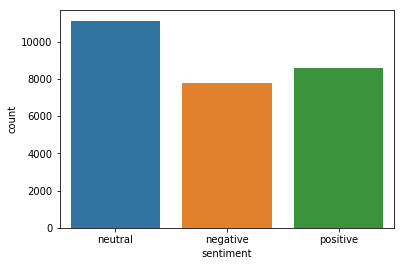

In [71]:
sns.countplot(train_df['sentiment'], label = 'Count')

In [78]:
train_df['length'] = train_df['text'].str.len()
train_df

,text,selected_text,sentiment,length
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36.0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46.0
2,my boss is bullying me...,bullying me,negative,25.0
3,what interview! leave me alone,leave me alone,negative,31.0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75.0
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,92.0
6,2am feedings for the baby are fun when he is a...,fun,positive,64.0
7,Soooo high,Soooo high,neutral,10.0
8,Both of you,Both of you,neutral,12.0
9,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,69.0


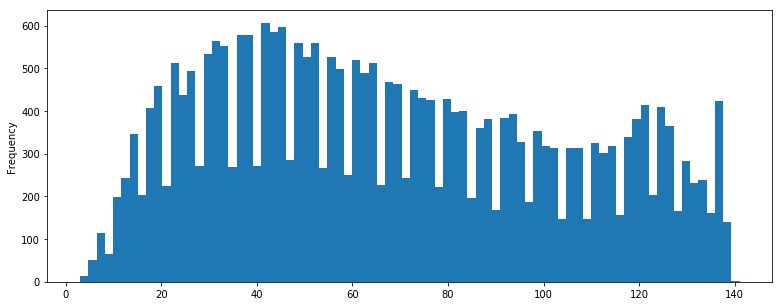

In [89]:
train_df['length'].plot(bins = 80, figsize = (13,5), kind = 'hist')

In [90]:
train_df.describe()

,length
count,27480.000000
mean,68.330022
std,35.603870
min,3.000000
25%,39.000000
50%,64.000000
75%,97.000000
max,141.000000


## Class Splitting

In [92]:
pos = train_df[train_df['sentiment'] == 'positive']
neg = train_df[train_df['sentiment'] == 'negative']
neutral = train_df[train_df['sentiment'] == 'neutral']

In [97]:
print("Positive tweets:",len(pos))
print("Negative tweets:",len(neg))
print("Neutral tweets:",len(neutral))
print("Total Tweets:",len(train_df))

Positive tweets: 8582
Negative tweets: 7781
Neutral tweets: 11118
Total Tweets: 27481


## E.g., Display all positive tweets

In [98]:
pos

,text,selected_text,sentiment,length
6,2am feedings for the baby are fun when he is a...,fun,positive,64.0
9,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,69.0
11,I really really like the song Love Story by Ta...,like,positive,56.0
21,Playing Ghost Online is really interesting. Th...,interesting.,positive,135.0
25,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive,51.0
28,juss came backk from Berkeleyy ; omg its madd ...,fun,positive,109.0
30,I`m going home now. Have you seen my new twitt...,Quite....heavenly,positive,84.0
31,i hope unni will make the audition . fighting ...,hope,positive,58.0
33,That`s very funny. Cute kids.,funny.,positive,31.0
39,A little happy for the wine jeje ok it`sm my f...,A little happy fo,positive,89.0


# Preprocessing of tweets

## 1. Remove "@" from tweets

In [181]:
def at_remover(input_txt, username):
    r = re.findall(username, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

## 2. lowercase, remove stopwords, remove punctuation

In [187]:
def cleanizer(inp):
    inp = inp.lower()                                             # Lowercases the string
    inp = re.sub('@[^\s]+', '', inp)                              # Removes usernames
    inp = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', inp)   # Remove URLs
    inp = re.sub(r"\d+", " ", str(inp))                           # Removes all digits
    inp = re.sub('&quot;'," ", inp)                               # Remove (&quot;) 
    inp = re.sub(r"\b[a-zA-Z]\b", "", str(inp))                   # Removes all single characters
    inp = re.sub(r"[^\w\s]", " ", str(inp))                       # Removes all punctuations
    inp = re.sub(r'(.)\1+', r'\1\1', inp)                         # Convert more than 2 letter repetitions to 2 letter
    inp = re.sub(r"\s+", " ", str(inp))                           # Replaces double spaces with single space    
    return inp

In [188]:
train_df['text'] = train_df['text'].apply(str)
train_df['at-sign removed'] = np.vectorize(at_remover)(train_df['text'], "@[\w]*")

In [189]:
train_df['clean_tweet'] = train_df['at-sign removed'].apply(cleanizer)

In [190]:
train_df.head()

,text,selected_text,sentiment,length,at-sign removed,clean_tweet
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36.0,"I`d have responded, if I were going",have responded if were going
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46.0,Sooo SAD I will miss you here in San Diego!!!,soo sad will miss you here in san diego
2,my boss is bullying me...,bullying me,negative,25.0,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,leave me alone,negative,31.0,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75.0,"Sons of ****, why couldn`t they put them on t...",sons of why couldn they put them on the relea...


In [191]:
vectorizer = CountVectorizer(analyzer = cleaner)
tokenized_tweets = vectorizer.fit_transform(train_df['clean_tweet'])
X = tokenized_tweets
y = train_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
Naive_Bayes = MultinomialNB()
Naive_Bayes.fit(X_train, y_train)
y_pred_TEST = Naive_Bayes.predict(X_test)
print(classification_report(y_test, y_pred_TEST))

              precision    recall  f1-score   support

    negative       0.67      0.59      0.62       795
     neutral       0.61      0.66      0.63      1152
    positive       0.70      0.71      0.70       802

    accuracy                           0.65      2749
   macro avg       0.66      0.65      0.65      2749
weighted avg       0.65      0.65      0.65      2749



In [200]:
acc = accuracy_score(y_pred_TEST, y_test)
print("Accuracy with Naive-bayes: ",acc)

Accuracy with Naive-bayes:  0.6518734085121862
